In [47]:
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster
import pandas as pd
import matplotlib.pyplot as plt
import os
import mpl_toolkits
from statistics import mean
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import sklearn.utils
os.getcwd()
import pandas_profiling as pp
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import seaborn as sns

from scipy.spatial.distance import pdist, squareform
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv(r'C:\Users\fawaz\Desktop\us-accidents\US_Accidents_June20.csv', parse_dates = ['Start_Time', 'End_Time'])
df.head()

ID    Source    TMC  Severity          Start_Time            End_Time  \
0  A-1  MapQuest  201.0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2 2016-02-08 07:39:07 2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  Number  \
0  Right lane blocked due to accident on I-70 Eas...     NaN   
1  Accident on Brice Rd at Tussing Rd. Expect del...  2584.0   
2  Accident on OH-32 State Route 32 Westbound at ...     NaN   
3  Accident on I-75 Southbound at Exits 52 52B US...     NaN   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...     NaN   

                      Street Side          City      County State     Zipcode  \
0                     I-70 E    R        Dayton  Montgomery    OH       45424   
1                   Brice Rd    L  Reynoldsburg    Franklin    OH  43068-3402   
2             State Route 32    R  Williamsburg    Clermont    OH       45176   
3                     I-75 S    R        Dayton  Montgomery    OH       45417   
4  Miamisburg Centerville Rd    R        Dayton  Montgomery    OH       45459   

  Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0      US  US/Eastern         KFFO  2016-02-08 05:58:00            36.9   
1      US  US/Eastern         KCMH  2016-02-08 05:51:00            37.9   
2      US  US/Eastern         KI69  2016-02-08 06:56:00            36.0   
3      US  US/Eastern         KDAY  2016-02-08 07:38:00            35.1   
4      US  US/Eastern         KMGY  2016-02-08 07:53:00            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            NaN         91.0         29.68            10.0           Calm   
1            NaN        100.0         29.65            10.0           Calm   
2           33.3        100.0         29.67            10.0             SW   
3           31.0         96.0         29.64             9.0             SW   
4           33.3         89.0         29.65             6.0             SW   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0              NaN               0.02        Light Rain    False  False   
1              NaN               0.00        Light Rain    False  False   
2              3.5                NaN          Overcast    False  False   
3              4.6                NaN     Mostly Cloudy    False  False   
4              3.5                NaN     Mostly Cloudy    False  False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   
3     False     False     False    False    False       False    False  False   
4     False     False     False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0            False           False         False          Night   
1            False           False         False          Night   
2            False            True         False          Night   
3            False           False         False          Night   
4            False            True         False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twili

In [49]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
ID                       3513617 non-null object
Source                   3513617 non-null object
TMC                      2478818 non-null float64
Severity                 3513617 non-null int64
Start_Time               3513617 non-null datetime64[ns]
End_Time                 3513617 non-null datetime64[ns]
Start_Lat                3513617 non-null float64
Start_Lng                3513617 non-null float64
End_Lat                  1034799 non-null float64
End_Lng                  1034799 non-null float64
Distance(mi)             3513617 non-null float64
Description              3513616 non-null object
Number                   1250753 non-null float64
Street                   3513617 non-null object
Side                     3513617 non-null object
City                     3513505 non-null object
County                   3513617 non-null object
State                    3513617

In [50]:
my_tab = pd.crosstab(index = [df["State"], df["Sunrise_Sunset"]], columns="counts")
my_tab

col_0                 counts
State Sunrise_Sunset        
AL    Day              34843
      Night             9782
AR    Day               1530
      Night              482
AZ    Day              60348
      Night            18236
CA    Day             554336
      Night           262481
CO    Day              38307
      Night            11422
CT    Day              19661
      Night             6240
DC    Day               3606
      Night             1179
DE    Day               4298
      Night             1441
FL    Day             196658
      Night            61316
GA    Day              68438
      Night            25176
IA    Day               8343
      Night             3131
ID    Day               1414
      Night              630
IL    Day              73682
      Night            26009
IN    Day              24703
      Night             9038
KS    Day               6265
      Night             1674
...                      ...
OK    Day              47134
      Night            12869
OR    Day              61288
      Night            28834
PA    Day              81970
      Night            24817
RI    Day               9436
      Night             2317
SC    Day             134754
      Night            38523
SD    Day                 35
      Night               26
TN    Day              55269
      Night            14626
TX    Day             254539
      Night            74745
UT    Day              36562
      Night            15123
VA    Day              72408
      Night            23667
VT    Day                518
      Night              184
WA    Day              46458
      Night            22086
WI    Day              15290
      Night             4828
WV    Day               1639
      Night              742
WY    Day                298
      Night              210

[98 rows x 1 columns]

In [51]:
df['duration'] = ((df['End_Time'] - df['Start_Time']).dt.total_seconds()/60)
average_duration = np.mean(df.duration)
print(average_duration, 'minutes')
print(average_duration/60, 'hours')

115.31835645412637 minutes
1.9219726075687729 hours


In [52]:
#begin exploration of data
#how many collisions occur during the day vs the night
day_night_data = pd.crosstab(index = df["Sunrise_Sunset"], columns = "count")
day_night_labels = 'Day', 'Night'
print(len(day_night_data))
day_night_data

2


col_0             count
Sunrise_Sunset         
Day             2593757
Night            919745

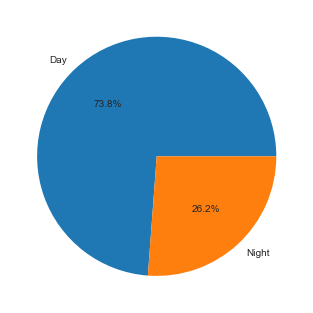

In [53]:
plt.pie(np.array(day_night_data).ravel(), labels = day_night_labels, autopct='%1.1f%%')
plt.show()

In [54]:
temperature_data = df['Temperature(F)']
#temperature_data = temperature_data.dropna()
temperature_data
freezing = 0
not_freezing = 0

#print(temperature_data.head(10))

#test1 = temperature_data.mean()
#test1

for row in temperature_data:
    if float(row) <= 32:
        freezing += 1
    else:
        not_freezing += 1
        

        
print(len(temperature_data))

print('freezing: ', freezing)
print('not_freezing: ', not_freezing)
print(temperature_data)

3513617
freezing:  258969
not_freezing:  3254648
0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
5          37.9
6          34.0
7          34.0
8          33.3
9          37.4
10         35.6
11         37.4
12         33.8
13         36.0
14         37.4
15         33.8
16         35.6
17         36.0
18         37.4
19         36.0
20         33.8
21         36.0
22         35.1
23         37.0
24         37.9
25         37.9
26         36.0
27         39.9
28         39.9
29         39.2
           ... 
3513587    82.0
3513588    85.0
3513589    76.0
3513590    76.0
3513591    80.0
3513592    81.0
3513593    93.0
3513594    77.0
3513595    75.0
3513596    80.0
3513597    74.0
3513598    82.0
3513599    74.0
3513600    75.0
3513601    90.0
3513602    89.0
3513603    76.0
3513604    82.0
3513605    79.0
3513606    86.0
3513607    78.0
3513608    88.0
3513609    73.0
3513610    75.0
3513611    81.0
3513612    86.0
3513613    70.0
3513614    73.0
3513615

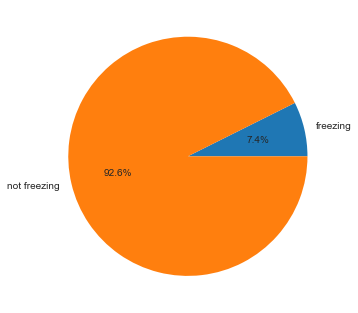

In [55]:
t_data = [freezing, not_freezing]
t_labels = 'freezing', 'not freezing'
plt.pie(np.array(t_data), labels = t_labels, autopct='%1.1f%%')
plt.show()

In [56]:
df_temp_reduced = df[['Severity', 'Temperature(F)']]
df_temp_reduced = df_temp_reduced.rename_axis(None)

#df_temp_reduced = df_temp_reduced.drop(df_temp_reduced.index[0])

#print(df_temp_reduced)

temperature_data_sev_1 = df_temp_reduced[(df_temp_reduced.Severity == 1) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_2 = df_temp_reduced[(df_temp_reduced.Severity == 2) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_3 = df_temp_reduced[(df_temp_reduced.Severity == 3) & (df_temp_reduced['Temperature(F)'])]
temperature_data_sev_4 = df_temp_reduced[(df_temp_reduced.Severity == 4) & (df_temp_reduced['Temperature(F)'])]

sev_1_list = temperature_data_sev_1['Temperature(F)'].to_list()
sev_2_list = temperature_data_sev_2['Temperature(F)'].to_list()
sev_3_list = temperature_data_sev_3['Temperature(F)'].to_list()
sev_4_list = temperature_data_sev_4['Temperature(F)'].to_list()

print(len(sev_1_list))
print(len(sev_2_list))
print(len(sev_3_list))
print(len(sev_4_list))

#print(sev_1_list)

28815
2330052
978604
109543


In [57]:
freezing1 = 0
freezing2 = 0
freezing3 = 0
freezing4 = 0

not_freezing1 = 0
not_freezing2 = 0
not_freezing3 = 0
not_freezing4 = 0

for x in sev_1_list:
    if x <= 32:
        freezing1 += 1
    else:
        not_freezing1 += 1
        
for x in sev_2_list:
    if x <= 32:
        freezing2 += 1
    else:
        not_freezing2 += 1
        
for x in sev_3_list:
    if x <= 32:
        freezing3 += 1
    else:
        not_freezing3 += 1
        
for x in sev_4_list:
    if x <= 32:
        freezing4 += 1
    else:
        not_freezing4 += 1
        
total_freezing = [freezing1, freezing2, freezing3, freezing4]
total_not_freezing = [not_freezing1, not_freezing2, not_freezing3, not_freezing4]

print(total_freezing)
print(total_not_freezing)

[255, 168458, 77156, 12229]
[28560, 2161594, 901448, 97314]


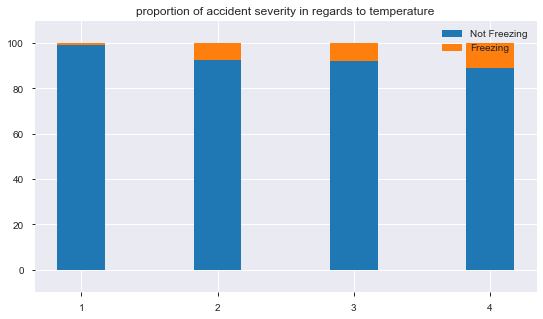

In [58]:
N = 4

ind = np.arange(N)
width = 0.35

overall = []
for x in range(0, len(total_freezing)):
    overall.append(total_freezing[x] + total_not_freezing[x])

proportion_freezing = np.true_divide(total_freezing, overall) * 100
proportion_not_freezing = np.true_divide(total_not_freezing, overall) * 100

plt.figure(figsize=(9,5))

p1 = plt.bar(ind, proportion_not_freezing, width)
p2 = plt.bar(ind, proportion_freezing, width, bottom = proportion_not_freezing)

plt.xticks(ind, ('1', '2','3','4'))
plt.ylim(-10, 110)

plt.legend((p1[0], p2[0]), ('Not Freezing', 'Freezing'))

#print(overall)
plt.title('proportion of accident severity in regards to temperature')
plt.show()

In [59]:
df['month'] = df['Start_Time'].dt.month
df['year'] = df['Start_Time'].dt.year
df['hour'] = df['Start_Time'].dt.hour
df['day'] = df['Start_Time'].dt.weekday

#print(df['year'][:10])

year_ticks = [2016, 2017, 2018, 2019, 2020]

In [60]:
#_ = df.groupby('hour').size().plot(kind = 'bar')

<Figure size 1440x720 with 0 Axes>

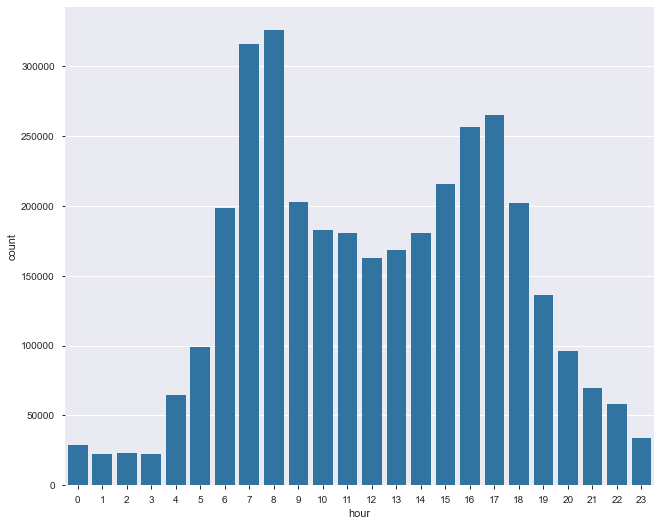

In [61]:
plt.figure(figsize=(20,10))
#sns.color_palette(palette = 'PuBu', n_colors = 1, as_cmap = False)
ax = sns.catplot(x = 'hour', data = df, kind = 'count', palette = sns.color_palette(['tab:blue']))
ax.fig.set_size_inches(10,7.5)

Text(0.5, 1.0, 'accidents per day')

<Figure size 1080x720 with 0 Axes>

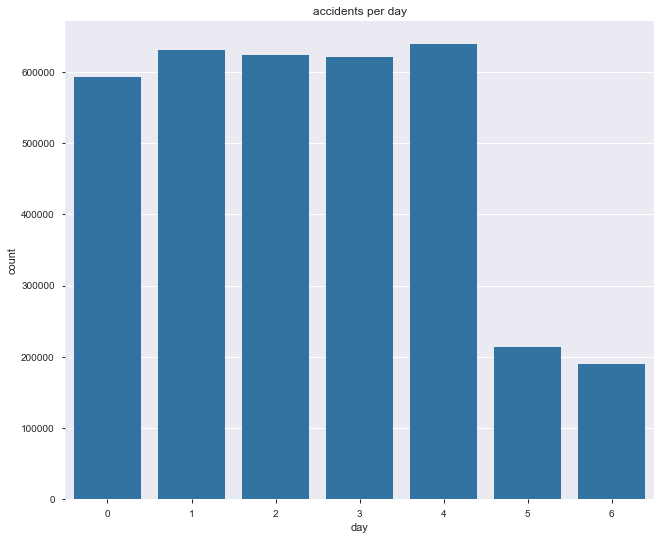

In [62]:
ax = plt.figure(figsize = (15,10))
ax = sns.catplot(x = 'day', data = df, kind = 'count', palette = sns.color_palette(['tab:blue']))
#plt.xticks(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.fig.set_size_inches(10,7.5)
plt.title('accidents per day')

#day 0 is monday and so on

In [63]:
#df_year = df[df['year'] > 2015]
#_ = df.groupby(df['year']).size().plot(kind = 'bar')


Text(0.5, 1.0, 'accidents per year')

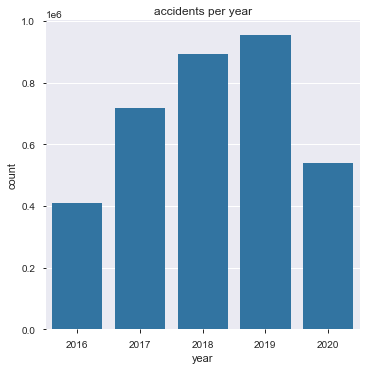

In [64]:
_ = sns.catplot(x = 'year', data = df, kind = 'count', palette = sns.color_palette(['tab:blue']))
plt.title('accidents per year')

In [65]:
#year_ticks = [2016, 2017, 2018, 2019, 2020]
#df.groupby('year')['Severity'].mean().plot(kind = 'line')
#_ = plt.xticks(year_ticks)
#plt.ylabel('average severity')

Text(0.5, 1.0, 'accidents per month')

<Figure size 1080x720 with 0 Axes>

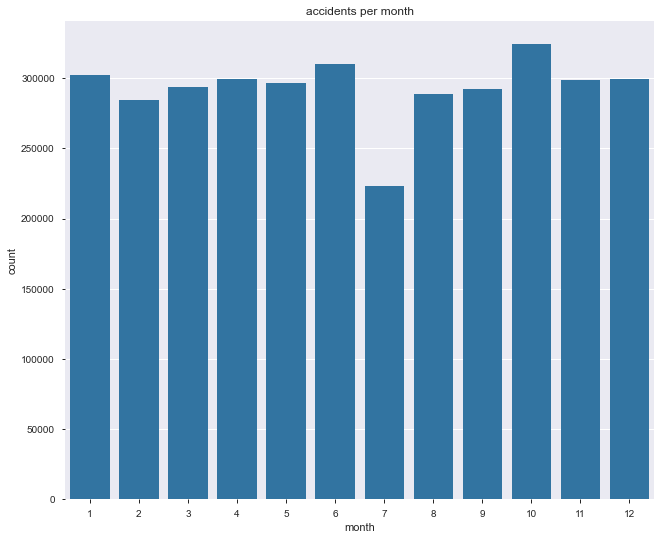

In [66]:
plt.figure(figsize=(15,10))
ax = sns.catplot(x = 'month', data = df, kind = 'count', palette = sns.color_palette(['tab:blue']))
ax.fig.set_size_inches(10,7.5)

plt.title('accidents per month')

year
2016    2.376624
2017    2.388994
2018    2.385202
2019    2.307982
2020    2.228253
Name: Severity, dtype: float64


Text(0.5, 1.0, 'average severity per year')

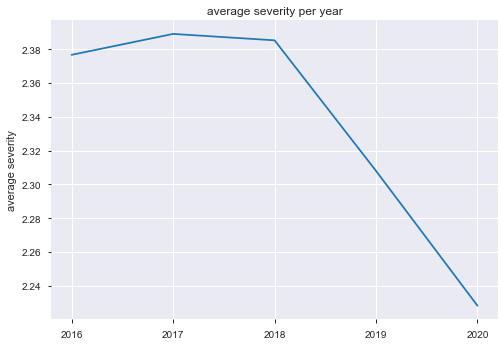

In [67]:
mean_sev = df.groupby('year')['Severity'].mean()
print(mean_sev)
plt.plot(mean_sev, c = 'tab:blue')
_ = plt.xticks(year_ticks)
plt.ylabel('average severity')

plt.title('average severity per year')

In [68]:
times = df.groupby('year')['duration'].mean()
print(times)

year
2016    196.731228
2017    158.282771
2018     92.780985
2019     88.615161
2020     80.693754
Name: duration, dtype: float64


Text(0.5, 1.0, 'average time to clear an accident per year')

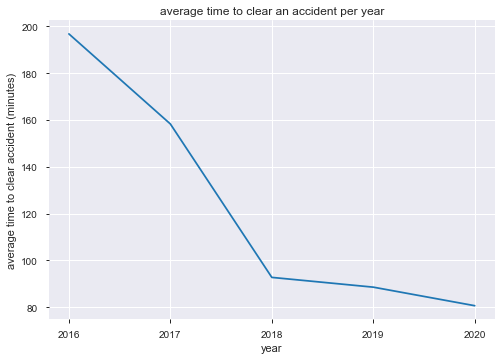

In [69]:
plt.plot(times, c = 'tab:blue')
_ = plt.xticks(year_ticks)
plt.ylabel('average time to clear accident (minutes)')
plt.xlabel('year')

plt.title('average time to clear an accident per year')

In [70]:
def str_type(text):
    if '-' in text or 'Fwy'in text or 'Expy' in text or 'Highway'in text or 'Hwy'in text :
        result = 'Highway'
    else:
        result = 'others'
    return result

df['street_type'] = df['Street'].apply(str_type)


In [71]:
types = df['street_type'].count()
types2 = df.groupby('street_type').count()
print(types)

df['street_type'].head()

3513617


0    Highway
1     others
2     others
3    Highway
4     others
Name: street_type, dtype: object

Text(0.5, 1.0, 'duration of delay by street type')

<Figure size 1080x720 with 0 Axes>

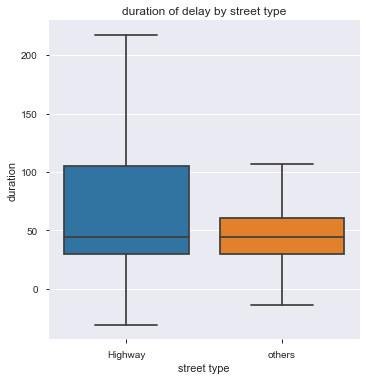

In [72]:
plt.figure(figsize=(15,10))
_ = sns.catplot(x = 'street_type', y = 'duration', data = df, kind = 'box', sym = '')
plt.xlabel('street type')
plt.title('duration of delay by street type')

In [73]:
street_severity = df.groupby('street_type')['Severity'].mean()
print(street_severity)

street_type
Highway    2.491116
others     2.206125
Name: Severity, dtype: float64


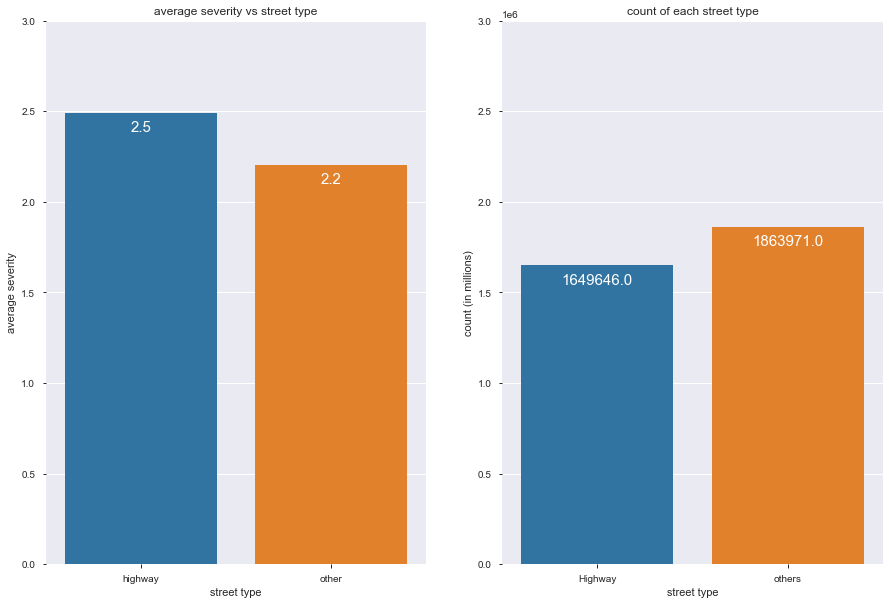

In [74]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
ax = sns.barplot(x = ['highway', 'other'], y = street_severity)
plt.xlabel('street type')
plt.ylabel('average severity')
plt.ylim(0, 3)
plt.title('average severity vs street type')
for i in ax.patches:
    plt.annotate(format(i.get_height(), '.1f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center',
                va = 'center', size = 15, xytext = (0, -15), textcoords = 'offset points', c = 'w')

plt.subplot(122)
ax = sns.countplot(x = 'street_type', data = df)
plt.title('count of each street type')
plt.ylim(0, 3e6)
plt.ylabel('count (in millions)')
#plt.subplots_adjust(None, None, 4)
_ = plt.xlabel('street type')
for i in ax.patches:
    plt.annotate(format(i.get_height(), '.1f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center',
                va = 'center', size = 15, xytext = (0, -15), textcoords = 'offset points', c = 'w')

In [75]:
df_city = df.groupby('City').size().to_frame('count_city')
df_city = df_city.reset_index().sort_values('count_city', ascending = False)[:11]
print(df_city)

               City  count_city
4879        Houston      101240
6050    Los Angeles       79169
1770      Charlotte       78952
2486         Dallas       64790
425          Austin       63889
8720        Raleigh       44675
394         Atlanta       41126
7768  Oklahoma City       36340
6692          Miami       34549
581     Baton Rouge       34090
7182      Nashville       32919


Text(0.5, 1.0, 'Number of accidents in the top 10 cities')

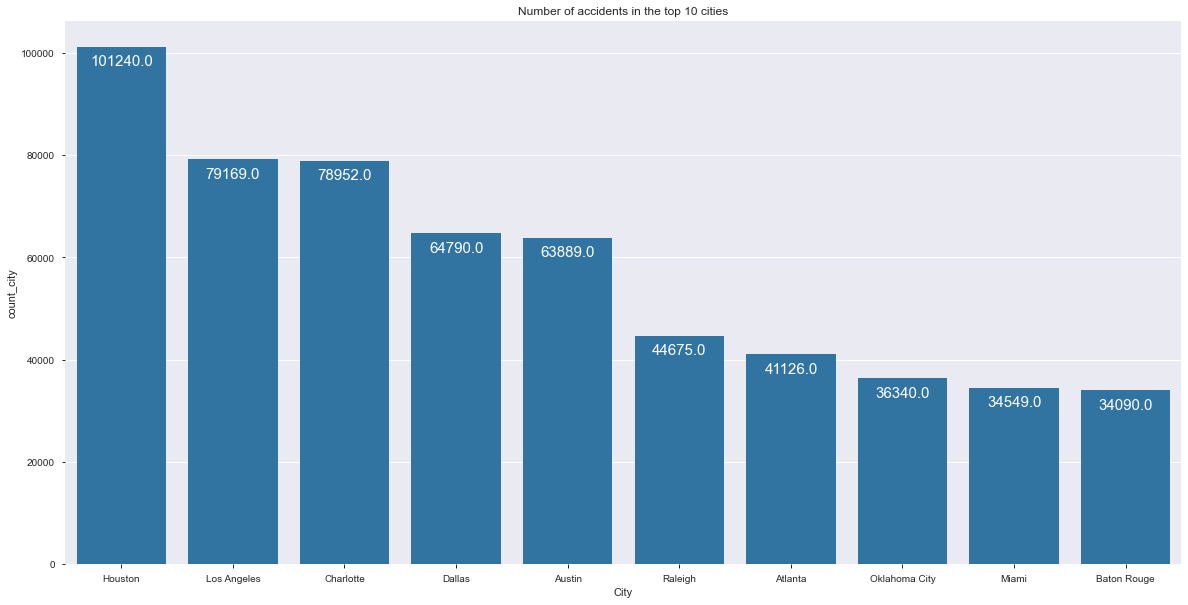

In [76]:
plt.figure(figsize = (20, 10))
blue_pal = sns.color_palette(['tab:blue'])
ax = sns.barplot(x = 'City', y = 'count_city', data = df_city[:10], palette = blue_pal)
for i in ax.patches:
    plt.annotate(format(i.get_height(), '.1f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center',
                va = 'center', size = 15, xytext = (0, -15), textcoords = 'offset points', c = 'w')
    
plt.title('Number of accidents in the top 10 cities')

In [77]:
df_severity = df.groupby('City')['Severity'].sum().to_frame('city_sev')
df_severity = df_severity.reset_index().sort_values('city_sev', ascending = False)[:11]

#print(df_city)
#print(df_severity)

#df_city = df.groupby('City').size().to_frame('count_city')
#df_city = df_city.reset_index().sort_values('count_city', ascending = False)[:10]

df_city_sev = pd.merge(df_severity, df_city)

city_sev = df_city_sev['city_sev'].to_list()

count_city = df_city_sev['count_city'].to_list()

sev = []
avg_sev = []
cities = []

#print('length of df_city_sev: ',len(df_city_sev))
#print('length of df_severity', len(df_severity))
#print('length of df_city: ', len(df_city))

#print(df_city)
#print(df_severity)
#print(df_city_sev)

for i in range(0, (len(city_sev))):
    avg_sev.append(city_sev[i] / count_city[i])
    cities.append(df_city_sev['City'][i])
    
print(type(cities[0]))
print(type(avg_sev[0]))
    
dict_cities = dict(zip(cities, avg_sev))

dict_cities = {k: v for k, v in sorted(dict_cities.items(), key=lambda item: item[1], reverse = True)}
dict_cities.pop('Nashville')

print(dict_cities)

<class 'str'>
<class 'float'>
{'Atlanta': 2.670305889218499, 'Miami': 2.4262930909722424, 'Dallas': 2.397082883160982, 'Los Angeles': 2.3718121992193915, 'Houston': 2.2377321216910313, 'Raleigh': 2.159753777280358, 'Baton Rouge': 2.1437078322088587, 'Austin': 2.1300223825697695, 'Oklahoma City': 2.1259493670886074, 'Charlotte': 2.0697385753369137}


Text(0, 0.5, 'average severity')

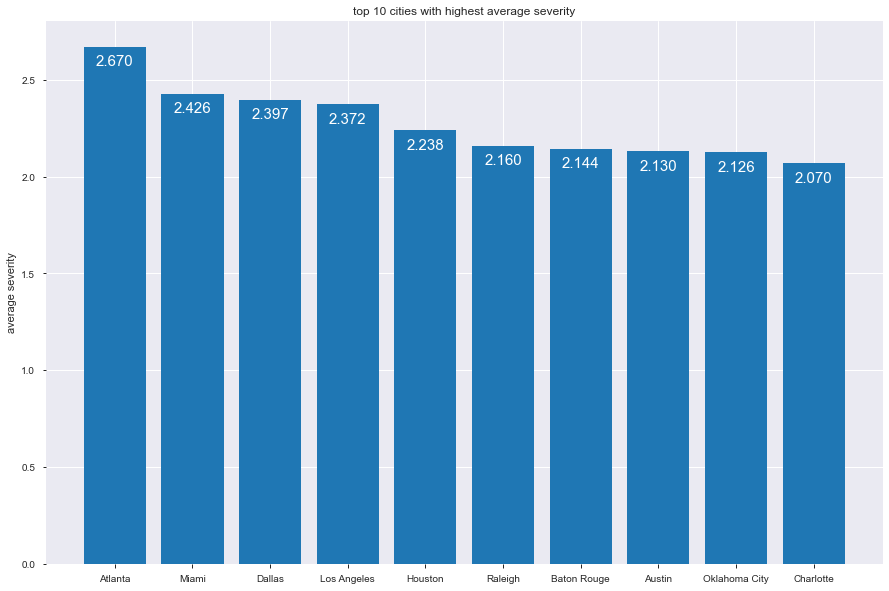

In [78]:
keys = dict_cities.keys()
values = dict_cities.values()

#print(keys)
#print(values)
plt.figure(figsize=(15,10))
ax = plt.bar(keys, values, color = 'tab:blue')

for i in ax.patches:
    plt.annotate(format(i.get_height(), '.3f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center',
                va = 'center', size = 15, xytext = (0, -15), textcoords = 'offset points', c = 'w')
    
plt.title('top 10 cities with highest average severity')
plt.ylabel('average severity')

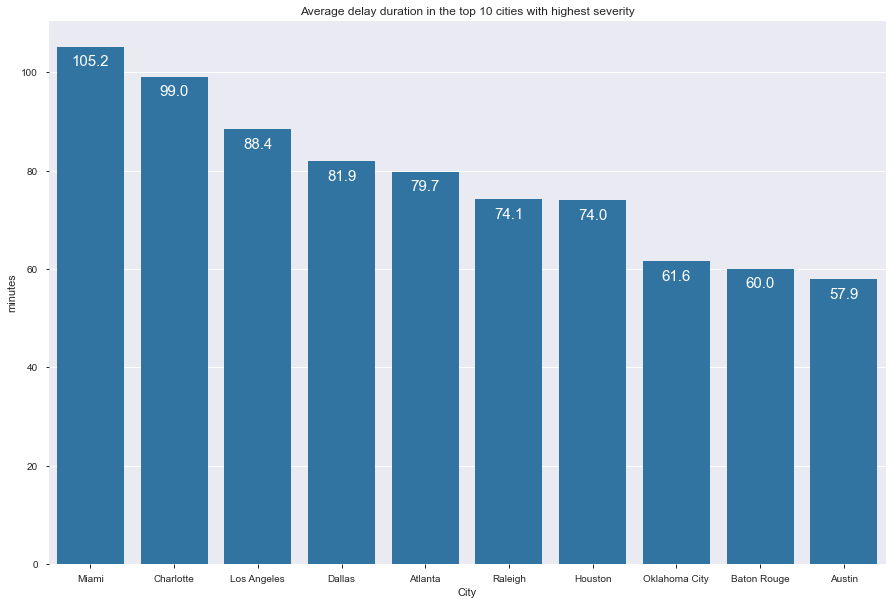

In [79]:
df_city_dur = df.groupby('City')['duration'].mean().to_frame('mean_dur')
df_city_dur = df_city_dur.reset_index().sort_values('mean_dur', ascending = False)

dura_list = []

#print(df_city_dur)

dura_list = df_city_dur.loc[df_city_dur['City'].isin(keys)]

plt.figure(figsize=(15,10))
ax = sns.barplot(x = dura_list['City'], y = dura_list['mean_dur'], palette = blue_pal)
plt.title('Average delay duration in the top 10 cities with highest severity')
plt.ylabel('minutes')

for i in ax.patches:
    plt.annotate(format(i.get_height(), '.1f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center',
                va = 'center', size = 15, xytext = (0, -15), textcoords = 'offset points', c = 'w')

In [80]:
sev_count = df.groupby('City')['Severity'].count().to_frame('total_sev')
sev_count = sev_count.reset_index().sort_values('total_sev', ascending = False)
sev_count = sev_count.loc[sev_count['City'].isin(keys)]

city_s_1 = []
city_s_2 = []
city_s_3 = []
city_s_4 = []

for i in keys:
    city_s_1.append(df[(df['Severity']==1)&(df['City']==i)].count()['ID'])
    city_s_2.append(df[(df['Severity']==2)&(df['City']==i)].count()['ID'])
    city_s_3.append(df[(df['Severity']==3)&(df['City']==i)].count()['ID'])
    city_s_4.append(df[(df['Severity']==4)&(df['City']==i)].count()['ID'])

In [81]:
print(keys)
total_list = []
for i in range(len(city_s_1)):
    total_list.append(city_s_1[i] + city_s_2[i] + city_s_3[i] + city_s_4[i])
      
print(sev_count)
print(total_list)

dict_keys(['Atlanta', 'Miami', 'Dallas', 'Los Angeles', 'Houston', 'Raleigh', 'Baton Rouge', 'Austin', 'Oklahoma City', 'Charlotte'])
               City  total_sev
4879        Houston     101240
6050    Los Angeles      79169
1770      Charlotte      78952
2486         Dallas      64790
425          Austin      63889
8720        Raleigh      44675
394         Atlanta      41126
7768  Oklahoma City      36340
6692          Miami      34549
581     Baton Rouge      34090
[41126, 34549, 64790, 79169, 101240, 44675, 34090, 63889, 36340, 78952]


In [82]:
print(city_s_1)

[121, 60, 23, 18, 51, 286, 480, 17, 17, 487]


In [83]:
prop_1 = []
prop_2 = []
prop_3 = []
prop_4 = []

for i in range(len(city_s_1)):
    prop_1.append(np.true_divide(city_s_1[i], total_list[i]) * 100)
    prop_2.append(np.true_divide(city_s_2[i], total_list[i]) * 100)
    prop_3.append(np.true_divide(city_s_3[i], total_list[i]) * 100)
    prop_4.append(np.true_divide(city_s_4[i], total_list[i]) * 100)
    

Text(0.5, 0, 'city')

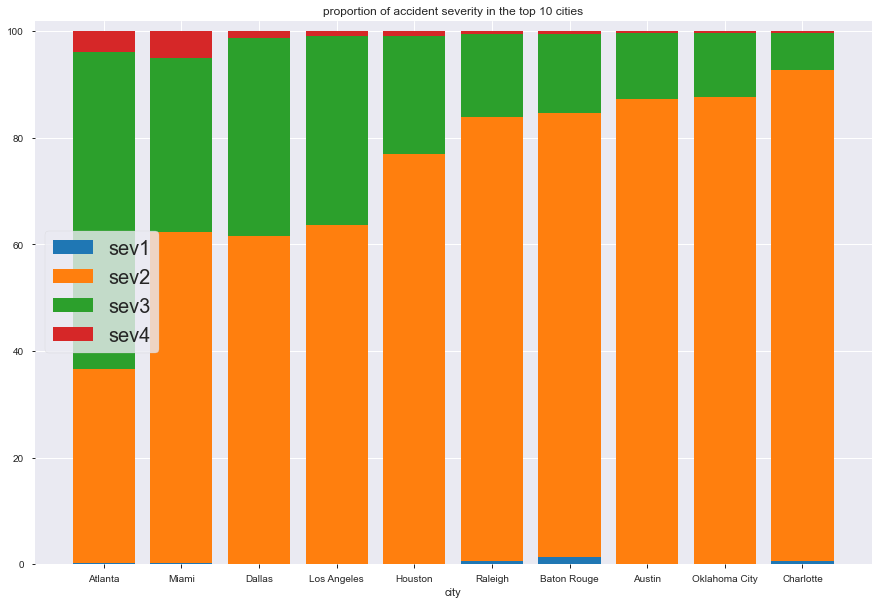

In [84]:
p1 = plt.figure(figsize = (15, 10))

#print(prop_1)
#print(prop_2)
#print(prop_3)
#print(prop_4)

res_list3 = [prop_1[i] + prop_2[i] for i in range(len(prop_1))]
res_list4 = [prop_1[i] + prop_2[i] + prop_3[i] for i in range(len(prop_1))]

p1 = plt.bar(keys, prop_1, bottom = 0, label = 'sev1')
p2 = plt.bar(keys, prop_2, bottom = prop_1, label = 'sev2')
p3 = plt.bar(keys, prop_3, bottom = res_list3, label = 'sev3')
p4 = plt.bar(keys, prop_4, bottom = res_list4, label = 'sev4')

plt.legend(loc = 'center left', frameon = True, prop={"size":20})

plt.ylim(0, 102)
plt.title('proportion of accident severity in the top 10 cities')
plt.xlabel('city')

In [85]:
df_reduced = df[(df.City.isin(cities))]
#print(df_reduced)

In [86]:
def generateBaseMap(default_location=[df_reduced['Start_Lat'].mean(), df_reduced['Start_Lng'].mean()], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start, prefer_canvas = True)
    return base_map

generateBaseMap()

In [87]:
base_map = generateBaseMap()
mc = MarkerCluster()
#fmc = FastMarkerCluster()

#for row in df_reduced.itertuples():
    #mc.add_child(folium.Marker(location=[row.Start_Lat, row.Start_Lng]))
    #fmc.add_child(folium.Marker(Location = [row.Start_Lat, row.Start_Lng]))
    
#base_map.add_child(FastMarkerCluster(df_reduced[['Start_Lat', 'Start_Lng']].values.tolist()))
#base_map

In [88]:
#accident_array = df_reduced[['Start_Lat', 'Start_Lng']].values
#base_map.add_child(HeatMap(accident_array, radius=15))
#base_map

In [89]:
df_reduced_dallas_day = df[(df.City == 'Dallas') & (df.Sunrise_Sunset == 'Day')]
#print(df_reduced_dallas_day)

In [90]:
def generateBaseMap(default_location=[df_reduced_dallas_day['Start_Lat'].mean(), df_reduced_dallas_day['Start_Lng'].mean()], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start, prefer_canvas = True)
    return base_map

generateBaseMap()

In [91]:
base_map2 = generateBaseMap()

accident_array2 = df_reduced_dallas_day[['Start_Lat', 'Start_Lng']].values
base_map2.add_child(FastMarkerCluster(df_reduced_dallas_day[['Start_Lat', 'Start_Lng']].values.tolist()))
base_map2.add_child(HeatMap(accident_array2, radius=15))
base_map2

In [92]:
df_reduced_dallas_night = df[(df.City == 'Dallas') & (df.Sunrise_Sunset == 'Night')]

base_map3 = generateBaseMap()
accident_array3 = df_reduced_dallas_night[['Start_Lat', 'Start_Lng']].values
base_map3.add_child(FastMarkerCluster(df_reduced_dallas_night[['Start_Lat', 'Start_Lng']].values.tolist()))
base_map3.add_child(HeatMap(accident_array3, radius=15))
base_map3